In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('/home/vinod/Downloads/Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [4]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [5]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [6]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [7]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data.shape

(10683, 11)

In [10]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
data.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [12]:
data['Hour']=data['Dep_Time'].apply(lambda x:x.split(':')[0])
data['mintues']=data['Dep_Time'].apply(lambda x:x.split(':')[1])

In [13]:
data.drop(['Dep_Time'],axis=1,inplace=True)

In [14]:
def datetime_fun(data):
    data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
    data['hour']=data['Arrival_Time'].dt.hour
    data['minute']=data['Arrival_Time'].dt.minute
    

In [15]:
datetime_fun(data)

In [16]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Hour,mintues,hour,minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-24 13:15:00,7h 25m,2 stops,No info,7662,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,09,25,4,25


In [17]:
def datetime(data):
    data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
    data['year']=data['Date_of_Journey'].dt.year
    data['month']=data['Date_of_Journey'].dt.month
    data['day']=data['Date_of_Journey'].dt.day

In [18]:
datetime(data)
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Hour,mintues,hour,minute,year,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,22,20,1,10,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-24 13:15:00,7h 25m,2 stops,No info,7662,05,50,13,15,2019,1,5


In [20]:
data.drop(['Date_of_Journey','Arrival_Time','Duration','Route'],axis=1,inplace=True)

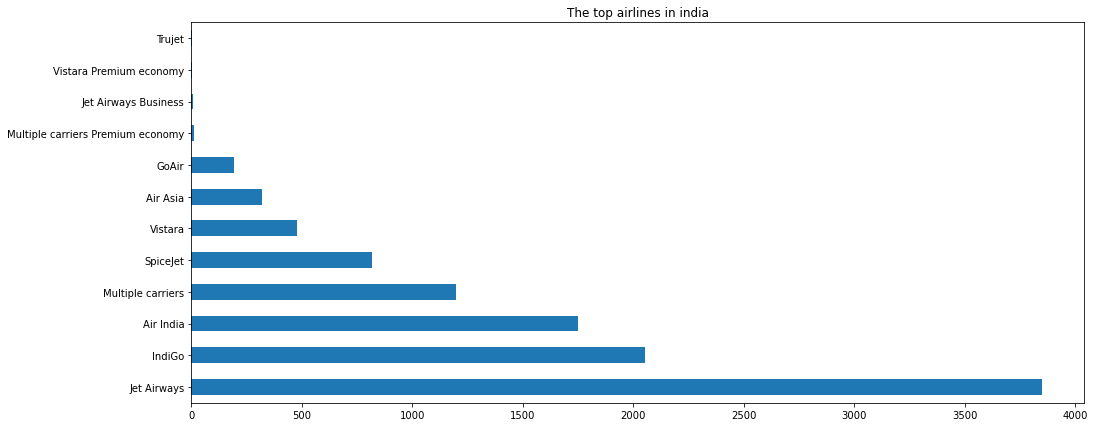

In [21]:
plt.figure(figsize=(16,7))
data['Airline'].value_counts().plot(kind='barh')
plt.title("The top airlines in india")
plt.show()

In [22]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [23]:
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':3, '3 stops':3,'4 stops':4})

In [24]:
airline_source=data.groupby(['Airline','Source']).size().reset_index().rename(columns={0:"airlines_sources"})
airline_source.head()

,Airline,Source,airlines_sources
0,Air Asia,Banglore,89
1,Air Asia,Delhi,80
2,Air Asia,Kolkata,150
3,Air India,Banglore,332
4,Air India,Chennai,25


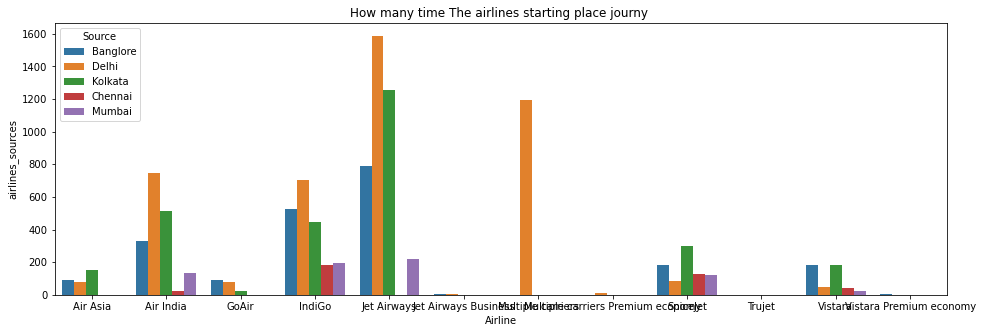

In [25]:
plt.figure(figsize=(16,5))
sns.barplot(x='Airline',y='airlines_sources',data=airline_source,hue='Source')
plt.title("How many time The airlines starting place journy ")
plt.show()

In [26]:
airline_designation=data.groupby(['Airline','Destination']).size().reset_index().rename(columns={0:"airlines_sources"})
airline_designation.head()

,Airline,Destination,airlines_sources
0,Air Asia,Banglore,150
1,Air Asia,Cochin,80
2,Air Asia,Delhi,71
3,Air Asia,New Delhi,18
4,Air India,Banglore,512


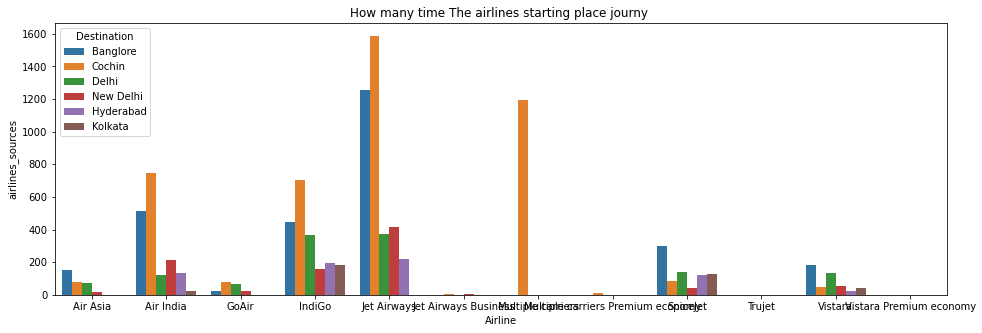

In [27]:
plt.figure(figsize=(16,5))
sns.barplot(x='Airline',y='airlines_sources',data=airline_designation,hue='Destination')
plt.title("How many time The airlines starting place journy ")
plt.show()

In [28]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Hour', 'mintues', 'hour', 'minute', 'year', 'month', 'day'],
      dtype='object')

In [29]:
airline_prices=data.groupby(['Airline','Price']).size().reset_index().rename(columns={0:"airlines_prices"})
airline_prices

,Airline,Price,airlines_prices
0,Air Asia,3383,31
1,Air Asia,3782,4
2,Air Asia,3807,19
3,Air Asia,4082,3
4,Air Asia,4107,11
...,...,...,...
1973,Vistara,21520,1
1974,Vistara,21730,2
1975,Vistara Premium economy,5969,1
1976,Vistara Premium economy,9125,1


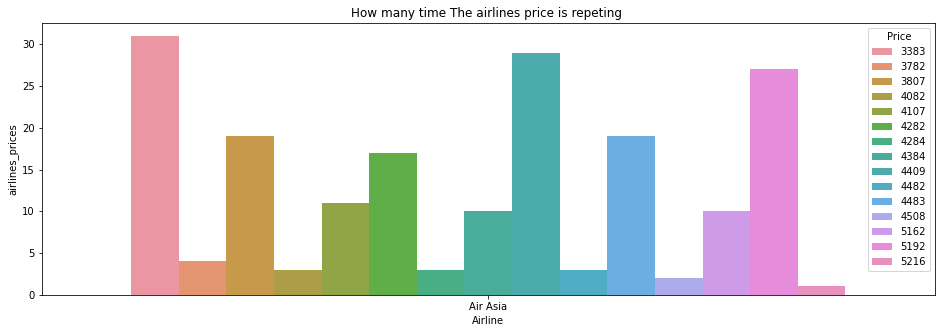

In [30]:
plt.figure(figsize=(16,5))
sns.barplot(x='Airline',y='airlines_prices',data=airline_prices[:15],hue='Price')
plt.title("How many time The airlines price is repeting ")
plt.show()

In [31]:
airline_prices_month=data.groupby(['Airline','Price','month']).size().reset_index().rename(columns={0:"airlines_prices_month"})
airline_prices_month.head()

,Airline,Price,month,airlines_prices_month
0,Air Asia,3383,3,3
1,Air Asia,3383,4,3
2,Air Asia,3383,5,10
3,Air Asia,3383,6,11
4,Air Asia,3383,9,1


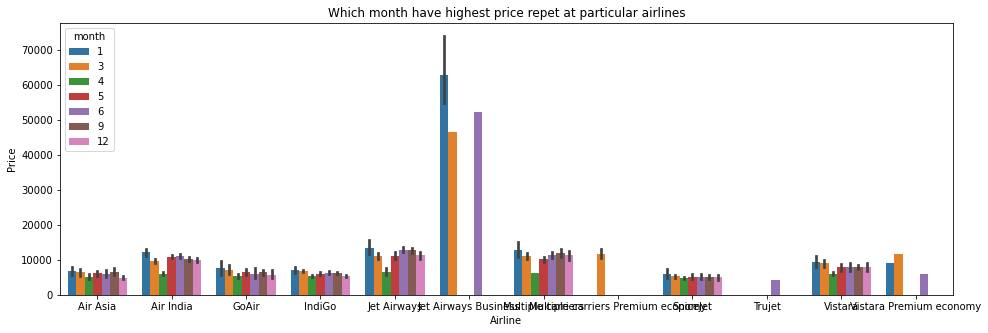

In [32]:
plt.figure(figsize=(16,5))
sns.barplot(x='Airline',y='Price',data=airline_prices_month,hue='month')
plt.title("Which month have highest price repet at particular airlines")
plt.show()

In [33]:
data.isna().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Price              0
Hour               0
mintues            0
hour               0
minute             0
year               0
month              0
day                0
dtype: int64

In [34]:
data.dropna(axis=0,inplace=True)

In [35]:
data.isna().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Hour               0
mintues            0
hour               0
minute             0
year               0
month              0
day                0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label=LabelEncoder()
data['Airline']=label.fit_transform(data['Airline'])
data['Source']=label.fit_transform(data['Source'])
data['Destination']=label.fit_transform(data['Destination'])
data['Additional_Info']=label.fit_transform(data['Additional_Info'])

In [38]:
data['year'].unique()

array([2019])

In [39]:
data['month'].unique()

array([ 3,  1,  9, 12,  6,  5,  4])

In [40]:

data['day'].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4])

In [41]:
X=data.drop(['Price'],axis=1)
y=data['Price']

In [42]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Hour,mintues,hour,minute,year,month,day
0,3,0,5,0.0,8,22,20,1,10,2019,3,24
1,1,3,0,2.0,8,05,50,13,15,2019,1,5
2,4,2,1,2.0,8,09,25,4,25,2019,9,6
3,3,3,0,1.0,8,18,05,23,30,2019,12,5
4,3,0,5,1.0,8,16,50,21,35,2019,1,3


In [43]:
from sklearn.model_selection import train_test_split

In [44]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:



from sklearn.ensemble import RandomForestRegressor

In [46]:
random=RandomForestRegressor(n_estimators=50,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=15,
    random_state=42,
    verbose=0,
    warm_start=False,
    ccp_alpha=1.0)
random.fit(X_train,y_train)

RandomForestRegressor(ccp_alpha=1.0, max_features='auto', n_estimators=50,
                      n_jobs=15, random_state=42)

In [47]:
random.score(X_test,y_test)

0.898087308391783

In [48]:
random.score(X_train,y_train)

0.9780862524795729

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid=GridSearchCV(estimator=random,
    param_grid={'max_depth':[10,20,30]},
    n_jobs=15,
    refit=True,
    cv=5,
    verbose=0,
    pre_dispatch='2*n_jobs',
    return_train_score=False)

In [51]:
grid.fit(X_train,y_train)

/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(ccp_alpha=1.0, max_features='auto',
                                             n_estimators=50, n_jobs=15,
                                             random_state=42),
             n_jobs=15, param_grid={'max_depth': [10, 20, 30]})

In [52]:
grid.score(X_test,y_test)

0.898087308391783

In [65]:
grid.score(X_train,y_train)

0.9780862524795729

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
sear=RandomizedSearchCV(estimator=random,
    param_distributions={'max_depth':[10,20,30]},
    n_jobs=15)

In [55]:
sear.fit(X_train,y_train)

/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

RandomizedSearchCV(estimator=RandomForestRegressor(ccp_alpha=1.0,
                                                   max_features='auto',
                                                   n_estimators=50, n_jobs=15,
                                                   random_state=42),
                   n_jobs=15, param_distributions={'max_depth': [10, 20, 30]})

In [56]:


sear.score(X_test,y_test)

0.898087308391783

In [57]:
print("The test socre",grid.score(X_test,y_test))
print("The test socre",grid.score(X_train,y_train))

The test socre 0.898087308391783
The test socre 0.9780862524795729


In [58]:
print("The test socre",sear.score(X_test,y_test))
print("The test socre",sear.score(X_train,y_train))

The test socre 0.898087308391783
The test socre 0.9780862524795729


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:


reg=GradientBoostingRegressor(n_estimators=50,random_state=42)
reg.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [61]:
reg.score(X_test,y_test)

0.7978765136900214

In [62]:
regressor=RandomizedSearchCV(estimator=reg,
    param_distributions={'max_depth':[10,20,30,50]},
    n_jobs=20,cv=5,random_state=42)
regressor.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(n_estimators=50,
                                                       random_state=42),
                   n_jobs=20,
                   param_distributions={'max_depth': [10, 20, 30, 50]},
                   random_state=42)

In [63]:
regressor.score(X_test,y_test)

0.8726513099999064

In [64]:

regressor.score(X_train,y_train)

0.9829611412722712

In [66]:
import pickle

In [67]:
with open('flight_price_prediction.sav','wb') as file:
    pickle.dump(random,file)

In [ ]:
X.columns

In [ ]:
X['Airline'].unique()